In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
obj = pd.read_csv('2.csv')
obj.head()

,Time (s) Run #1,Angle (rad) Run #1,Angular Velocity (rad/s) Run #1,Angular Acceleration (rad/s²) Run #1,Position (m) Run #1,Velocity (m/s) Run #1,Acceleration (m/s²) Run #1,Time (s) Run #2,Angle (rad) Run #2,Angular Velocity (rad/s) Run #2,...,Position (m) Run #5,Velocity (m/s) Run #5,Acceleration (m/s²) Run #5,Time (s) Run #6,Angle (rad) Run #6,Angular Velocity (rad/s) Run #6,Angular Acceleration (rad/s²) Run #6,Position (m) Run #6,Velocity (m/s) Run #6,Acceleration (m/s²) Run #6
0,0.00,0.0,NaN,NaN,0.0,NaN,NaN,0.00,0.0,NaN,...,0.0,NaN,NaN,0.00,0.0,NaN,NaN,0.0,NaN,NaN
1,0.05,0.0,0.0,NaN,0.0,0.0,NaN,0.05,0.0,0.0,...,0.0,0.0,NaN,0.05,0.0,0.0,NaN,0.0,0.0,NaN
2,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,...,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0
3,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.0,0.0,...,0.0,0.0,0.0,0.15,0.0,0.0,0.0,0.0,0.0,0.0
4,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.20,0.0,0.0,...,0.0,0.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#finds amplitudes and corresponding times
runs = ['Angle (rad) Run #1', 'Angle (rad) Run #2', 'Angle (rad) Run #3', 'Angle (rad) Run #4', 'Angle (rad) Run #5', 'Angle (rad) Run #6']
runtimes = ['Time (s) Run #1', 'Time (s) Run #2', 'Time (s) Run #3','Time (s) Run #4','Time (s) Run #5', 'Time (s) Run #6']
amplitudes = []
times = []
for k in range(0, len(runs)): 
    length = len(obj[runs[k]])
    for i in range(0, length):
        if (i > 0) and (i < (length-1)):
            lesser = (obj[runs[k]][i-1] < obj[runs[k]][i])
            greater = (obj[runs[k]][i] > obj[runs[k]][i+1])
            if lesser and greater:
                amplitudes.append(obj[runs[k]][i])
                times.append(obj[runtimes[k]][i])
print("Length:", len(amplitudes), "first element: ", amplitudes[0], "length of times", len(times))
convert = {"Amplitudes" : amplitudes, "Times" : times}

Length: 49 first element:  0.253 length of times 49


In [25]:
#converts dict of amplitudes and times into dataframe 
data = pd.DataFrame.from_dict(convert)
data.head()

,Amplitudes,Times
0,0.253,3.05
1,0.240,4.05
2,0.227,5.05
3,0.214,6.05
4,0.201,7.00


C:\Users\alexandra lachmann\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'ln(Amplitude (rad))')

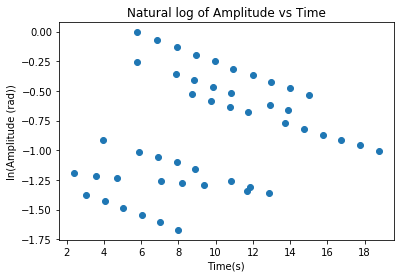

In [26]:
data["Natural Log Amplitudes"] = np.log(data['Amplitudes'])
y = data["Natural Log Amplitudes"].values
x = data["Times"].values
plt.plot(x,y,"o")
plt.title("Natural log of Amplitude vs Time")
plt.xlabel("Time(s)")
plt.ylabel("ln(Amplitude (rad))")